<h1><center>Geely Auto Case Study</center></h1>

<div style="text-align: right"> Submitted By: Kashif Sami

# Table of Contents

**[Business Understanding](#1)**
   - [About the Company](#1.1)
   - [Business Objective](#1.2)
   
**[Data Understanding & Cleaning](#2)**
  - [Import Libraries](#2.1)
  - [Import & Review Data](#2.2)
  - [Create Index Column](#2.3)  
  - [Deal with Null Values](#2.4)
  - [Deal with Columns having with Many Zeroes](#2.5)
  - [Clean strings](#2.6)
  - [Extract Car Make ](#2.7) 
  
  
**[Data Analysis & Preparation](#3)**
  - [Identify Data Types](#3.1)
  - [Analyze Numerical Variables](#3.2)
  - [Analyze & Encode Categorical Variables](#3.3)
      * [Ordinal Variables](#3.3.1)
      * [Nominal Variables with 2 levels](#3.3.2)
      * [Nominal Variables with 2+ levels](#3.3.3)
  - [Analyze Target Variable](#3.4)
  - [Train-Test Split](#3.5)
  - [Rescale Variables](#3.6)

  
**[Model Building & Evaluation](#4)**
   - [Model 1](#4.1)
   - [Model 2](#4.2)
   - [Model 3](#4.3)
   - [Model 4](#4.4)
   - [Model 5](#4.5)
   - [Model 6](#4.6)
   - [Model 7](#4.7)
   - [Model 8](#4.8)
   - [Model 9](#4.9)
   - [Model 10](#4.10)
   - [Model 11](#4.11)
   - [Model 12](#4.12)
   - [Residual Analysis](#1.1)

**[Predicting and Model Evaluation](#5)**
  - [Prepare Test Data](#5.1)
  - [Prediction on Test Data](#5.2)
  - [Evaluate Model](#5.3)
 

**[References](#6)**



<a id="1"></a>
## Business Understanding

<a id="1.1"></a>
**About the Company:** [GeelyAuto](https://www.geelyholding.com/)  is a privately held global automotive group headquartered in Hangzhou, Chinda. It sold over 1.5 million cars in 2018. 

<a id="1.2"></a>
**Business Objective:** Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. <br/>

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

<a id="1.2"></a>
**Business Goal:**

The goal is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

<a id="2"></a>
## Data Understanding & Cleaning

The purpose of this section is to :
- Import and understand the data set
- Run data quality checks and clean data, as needed

<a id="2.1"></a>
### Import Libraries


In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm #For linear regression modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor #For multicollinearity
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
# Set Parameters for Displaying data
pd.set_option('display.max_columns', 120)
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.max_colwidth', 100, 'display.max_rows', None, 'display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
sns.set_style("whitegrid")
%matplotlib inline

<a id="2.2"></a>
### Import & Review Data


In [6]:
data = pd.read_csv('CarPrice_Assignment.csv')

FileNotFoundError: [Errno 2] File CarPrice_Assignment.csv does not exist: 'CarPrice_Assignment.csv'

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.nunique().sort_values(ascending=False)

> **Observation:** Each row represnts a car with unique specifications. There are 205 such cars with 26 attributes/specifications.

<a id="2.3"></a>
### Creating an Index Column


In [ ]:
data.nunique().sort_values()

> **Observation:** Car_ID is unique for each row, let's set it as the index.

In [ ]:
# Rename column as id for simplification
data.rename(columns={'car_ID':'ID'},inplace=True)

In [ ]:
data.set_index('ID',inplace=True)

In [ ]:
data.head()

<a id="2.4"></a>
### Deal with Null Values

The Columns and Rows having most Null Values wil not be very usefeul in analysis, so let's remove them.

In [7]:
data.info()

NameError: name 'data' is not defined

In [ ]:
#Looking at columns with NaN Values
data.isnull().sum().sort_values(ascending=False)

In [ ]:
#Any rows with greater than 1 null value?
data[data.isnull().sum(axis=1)>1]

> **Observation:** There are zero null values, this is a very clean data set!

<a id="2.5"></a>
### Deal with Columns having many zeros

In [ ]:
#Number of non-zeros in each column?
data.astype(bool).sum(axis=0).sort_values(ascending=True)

In [ ]:
data['symboling'].unique()

> **Observation:** No zero values found except in symboling but symboling is a risk rating of cars that is suppose to vary from -3 (safest car) to 3 (riskiest car). Therefore, 0 is a valid value in Symboling.

<a id="2.6"></a>
### Clean strings


In [ ]:
# Stripping all the columns, so there are no leading or trailing white space
data=data.apply(lambda x: x.str.strip()if x.dtype == "object" else x)

In [ ]:
# Convert Data to lower case
data=data.apply(lambda x: x.str.lower()if x.dtype == "object" else x)

In [ ]:
data.head()

<a id="2.7"></a>
### Extract Car Make 



As explained in the assignment instructions, CarName is a combination of the car's make (honda, audi etc.) and car's model (civic, accord) and that only the make/company name has to be considered as an independent variable. Therefore, let's extract the car's make and then drop the original column.

In [ ]:
#Unique values
data['CarName'].unique()

In [ ]:
#As there is a space right after the car company name, let's use this to strip off the model details
data['CarName'] = data['CarName'].apply(lambda s:s.split()[0].strip())

In [ ]:
data.rename(columns={'CarName':'car_make'},inplace=True)

In [ ]:
#Result?
data.head()
data['car_make'].unique()

> **Observation:** Some company names are misspelled such as maxda instead of mazda. Let's fix this 

In [ ]:
#Replace maxda with mazda, porcshce with porsche, toyouta with toyota and vw,vokswagen with volkswagen 
data['car_make'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [ ]:
#Confirm fix
data['car_make'].unique()
data['car_make'].nunique()

<a id="3"></a>
## Data Analysis and Preparation

The purpose of this section is to :
- Understand the nature of the independent variables (univariate analysis)
- Understand correlation between independent and independent variables
- Prepare variables for regression modelling

<a id="3.1"></a>
### Identify Data Types

Let's identify the different data types in our dataset

In [ ]:
data.info()

>**Observation:** 
- The data types assigned during csv import are appropriate. 
- Symboling is a car rating ranging from -3 to 3 so it is categorical. Also, price is the dependent/target variable.  Therefore, there are 13 numeric and 10 categorical independent variables.

<a id="3.2"></a>
### Analyze Numerical Variables

In [ ]:
#Get list of numeric variables
num_vars = data.select_dtypes(exclude=['object']).columns
num_vars = list(num_vars)
num_vars.remove('symboling')#Remove symboling as it is a categorical variable
num_vars.remove('price')#Remove price as it is the dependent variable

#Let's review the numeric variables
data[num_vars].shape
data[num_vars].head()

In [ ]:
#Let's get the statistical summary
data.describe()

Let's understand the relationship of numerical variables with price

In [ ]:
#Scatterplot of numerical variables vs price
sns.pairplot(data,x_vars=num_vars[:3],y_vars='price',height=6,aspect=1,kind='reg')
sns.pairplot(data,x_vars=num_vars[3:6],y_vars='price',height=6,aspect=1,kind='reg')
sns.pairplot(data,x_vars=num_vars[6:9],y_vars='price',height=6,aspect=1,kind='reg')
sns.pairplot(data,x_vars=num_vars[9:12],y_vars='price',height=6,aspect=1,kind='reg')

In [ ]:
#One variable left to plot!
sns.pairplot(data,x_vars=num_vars[12],y_vars='price',height=6,aspect=1,kind='reg')

In [ ]:
#Let's spot the highly correlated values
corr = data.corr()
high_corr = corr[(corr>.6) | (corr<-.6)]
high_corr

In [ ]:
#Let's spot the highly correlated values
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(high_corr,cmap="YlGnBu") 

> **Observation:**
- Several variables clearly have a linear relationship with Price so we can go on to build a Linear Relationship model with them
- Stroke, Compression Ratio, Peak RPM & Car Height have very weak linear relationships with Price. 
- Several variables have strong multicollinearity particularly **carlength, carwidth, curbweight,wheelbase & enginesize**. Also citympg and **highwaympg are highly** correlated. 
- Let's keep an eye on these variables during regression modelling.

In [ ]:
#Drop Stroke, Compression Ratio and Peak RPM from dataframe
# data.drop(columns=['stroke','compressionratio','peakrpm'],axis=1,inplace=True)

<a id="3.3"></a>
### Analyze & Encode Categorical Variables

In [ ]:
#Let's analyze the categorical variables
data.select_dtypes([object]).shape
data.select_dtypes([object]).nunique().sort_values()
data.select_dtypes([object]).head()

In [ ]:
#Get unique values in each categorical column
for col in data.select_dtypes([object]):
    print(col,":  ", data[col].unique(), "\n")

>**Observation:** 
- There are 10 categorical columns. 
- **Ordinal variables** - cylindernumber & doornumber have an atural order
- **Variables with exactly 2 unique values** - fueltype, aspiration & enginelocation 
- **Variables with more than 2 levels** - car_make, carbody, drivewheel, enginetype & fuelsystem 

Let's analyze the relationship between these variables and car price using boxplots

Note: A subplot is preferred for plotting multiple boxplots but given the number of levels per variable, it's best to create 1 boxplot in each cell.

In [ ]:
sns.boxplot(x='fueltype',y='price',data=data)

In [8]:
sns.boxplot(x='aspiration',y='price',data=data)

NameError: name 'data' is not defined

In [ ]:
sns.boxplot(x='doornumber',y='price',data=data)

In [ ]:
sns.boxplot(x='carbody',y='price',data=data)

In [ ]:
sns.boxplot(x='drivewheel',y='price',data=data)

In [ ]:
sns.boxplot(x='enginelocation',y='price',data=data)

In [ ]:
sns.boxplot(x='enginetype',y='price',data=data)

In [ ]:
sns.boxplot(x='cylindernumber',y='price',data=data)

In [ ]:
sns.boxplot(x='fuelsystem',y='price',data=data)

> **Observation:**
- Fuel Type, Aspiration, CarBody, DriveWheel, Engine location, Engine Type, CylinderNumber & FuelSystem all appear to impact car prices
- Door Number does not seem to have a relationship with car price

Let's now encode the categorical variables and re-evaluate their relationships with price

<a id="3.3.1"></a>
#### Encode Ordinal variables
Cylinder Number & Door Number are  categorical variables with a natural order i.e. they are ordinal variables. Let's encode them with Integers (Integer/Label Encoding)

In [ ]:
# Function to convert string number to number
def to_num(argument): 
    switcher = { 
        "two": 2, 
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6, 
        "eight": 8,
        "twelve": 12, 
    } 
    #Return corresponding number else 0
    return switcher.get(argument, 0) 

In [ ]:
data['cylindernumber'] = data['cylindernumber'].apply(lambda s:to_num(s)).astype(int)
data['doornumber'] = data['doornumber'].apply(lambda s:to_num(s)).astype(int)

In [ ]:
#Confirm the outcome
np.sort(data['cylindernumber'].unique())
np.sort(data['doornumber'].unique())

> __Let us ensure that the relationship between these numeric values and the prices is linear and NOT curvilinear. If it is curvilinear we will have to use one-hot encoding instead.__

In [ ]:
#Is there a linear relationship between these variables and prices?
data.corr().loc['cylindernumber','price']
data.corr().loc['doornumber','price']


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.regplot('cylindernumber','price',data=data)

plt.subplot(1,2,2)
sns.regplot('doornumber','price',data=data)

> **Observation:** 
- As the relationship is definitely linear, let's stick to the encoding we've done. 
- There is very weak correlation of doornumber with price.

Note: A 1/0 encoding for 'doornumber' would have worked as well, but only the scale of the parameter would change and not the fit/relationship between doornumber and price.

<a id="3.3.2"></a>
#### Encode Nominal Variables with 2-levels

Fuel Type, Aspiration and Engine Location have 2 possible values with no order.So, let's map them to 0 and 1. 

In [ ]:
data['fueltype'].unique()
data['aspiration'].unique()
data['enginelocation'].unique()

In [ ]:
#Map to 1/0 then convert to int
data['fueltype'] = data['fueltype'].apply(lambda s:1 if s=='diesel' else 0).astype(int)
data['aspiration'] = data['aspiration'].apply(lambda s:1 if s=='turbo' else 0).astype(int)
data['enginelocation'] = data['enginelocation'].apply(lambda s:1 if s=='rear' else 0).astype(int)

In [ ]:
#Confirm outcome
data['fueltype'].unique()
data['aspiration'].unique()
data['enginelocation'].unique()

In [ ]:
#Is there a linear relationship between these variables and car price?
data.corr().loc['fueltype','price']
data.corr().loc['aspiration','price']
data.corr().loc['enginelocation','price']


plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.regplot('fueltype','price',data=data)

plt.subplot(1,3,2)
sns.regplot('aspiration','price',data=data)

plt.subplot(1,3,3)
sns.regplot('enginelocation','price',data=data)

> **Observation:** There is certainly a linear relationship between price and each of fuel type, aspiration & engine location.

<a id="3.3.3"></a>
#### Encode Nominal Variables with 2+ levels

Car Make, Car Body,Drive Wheel,Engine Type and Fuel System have more than 2 unique but unordered. Let's encode them using one-hot encoding (dummy variables).

In [ ]:
#List of variables to be encoded
cat_vars = ['car_make','carbody','drivewheel','enginetype','fuelsystem']

#Convert to dummy variables
data = pd.get_dummies(data=data,columns=cat_vars,drop_first=True)

In [ ]:
data.head()
data.info()

> **Observations:** One-Hot Encoding gave us 40 new columns

In [ ]:
#How many dummy variables have less than 10 observations?
data.astype('uint8').sum(axis=0).sort_values(ascending=True)

> **Observation:** There are several dummy variables that have less than 10 observation for example there are only 2 mercury cars in the data set. These could adversely effect the regression model as there aren't sufficient observations to fit to.

In [ ]:
#Let's drop columns with less than 10 values, else these will affect the regression model later.
# data.drop(['car_make_mercury','fuelsystem_mfi','enginetype_dohcv','fuelsystem_spfi','car_make_renault','enginelocation', 'fuelsystem_4bbl','car_make_jaguar','car_make_chevrolet', 'enginetype_rotor', 'car_make_isuzu','car_make_porsche','car_make_saab','car_make_audi','car_make_plymouth','carbody_hardtop','car_make_buick','car_make_bmw','car_make_dodge','fuelsystem_spdi'], axis=1, inplace=True)

Let's now look at the correlation of categorical variables

In [ ]:
#Spot high correlations
corr = data.select_dtypes(['uint8']).corr()
high_corr = corr[(corr>.6) | (corr<-.6)]
high_corr

In [ ]:
#Let's visualize the correlations
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(high_corr ,cmap="YlGnBu") 

> **Observations:**
- Engine_type_i and car_make_peugeot are highly correlated
- Engine_type_ohcf and car_make_subaru are high correlated
- fuelsystem_spdi and car_make_mitsubishi are significantly correlated
- Enginetype_rotor and fuelsystem_4bbl pairs are significantly correlated

Let's review the correlation of ALL variables - numerical and encoded categorical

In [ ]:
#Spot high correlations
corr = data.corr()
high_corr = corr[(corr>.8) | (corr<-.8)]
high_corr.loc['compressionratio',:]
# compression ratio, fuelsystem_4bbl, highwaympg, cylindernumber

In [ ]:
#Let's visualize the correlations
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(high_corr ,cmap="YlGnBu") 

In [ ]:
#Final dataframe
data.shape

> **Observation:** 
- In addition to the previous correlation observations, we find that compressionratio is highly correlated to fuel_type and fuelsystem_idi. 
- We have 60 independent variables to analyze

<a id='3.4'></a>
## Analyze Target Variable

Let's quickly analyze the dependent/target variable - price

In [ ]:
data['price'].describe()

In [9]:
#Let's visualize the distribution
sns.boxplot(data['price'],orient='v')

NameError: name 'data' is not defined

In [ ]:
#Plot histogram of pricing just to understand distribution

fig = plt.figure()
sns.distplot(data['price'])
fig.suptitle("Distribution of Prices")
plt.xlabel("Car Price")

In [ ]:
# Plot features sorted by correlation to car price

corr = data.corr().sort_values('price', ascending=False)

#Positive correlations
corr_pos = corr[:34]
plt.figure(figsize=(12,10))
plt.xlabel('Positive Predictors of Price')
plt.xlabel('Car Price')
plt.ylabel('Positive Predictors')
sns.barplot(corr_pos.price[1:], corr_pos.index[1:], orient='h') 
plt.show()


#Negative correlations
corr_neg = corr[33:]
plt.figure(figsize=(12,10))
plt.xlabel('Negative Predictors of Price')
plt.xlabel('Car Price')
plt.ylabel('Negative Predictors')
sns.barplot(corr_neg.price[1:], corr_neg.index[1:], orient='h') 
plt.show()

> **Observation:**
- Larger number of cars have low price points but there are some outliers with very high prices as well.
- It is evident that predictors are not made equal! Some have significant correlations (positive or negative) while others have little to no correlation.
- About 11 predictors have >=0.5 correlation and 4 have <-0.5 correlation with car price

<a id='3.5'></a>
## Train-Test Split

Let's now split our data into train and test sets wherein train will be 70% of the original dataset using which we will build a regression model. 

In [ ]:
data_train, data_test = train_test_split(data,train_size=0.7,random_state=100)

In [ ]:
data_train.shape
data_test.shape

<a id='3.6'></a>
## Rescale Variables

Let's bring all numeric variables to the same scale so as to simplify model evaluation and interpretation

In [ ]:
data.head(3)

In [ ]:
#Variables to scale
vars_to_scale = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [ ]:
#Instantiate scaler object
scaler = MinMaxScaler()

In [ ]:
#Fit variables 
data_train[vars_to_scale] = scaler.fit_transform(data_train[vars_to_scale])

In [ ]:
#Verify outcomes
data_train.describe()

In [ ]:
l

In [ ]:
data_test.head()

<a id='4.1'></a>
## Model Building & Evaluation

We'll now build linear regression models to predict price and evaluate these models as well

<a id='4.1'></a>
## Model 1 - With all variables

In [ ]:
#Let's start with building a model with ALL variables

In [ ]:
#Add constant 
X_train_const = sm.add_constant(X_train)
X_train_const.head()

In [ ]:
#Fit LR model on trainin data set
model_1 = sm.OLS(y_train,X_train_const).fit()
model_1

In [78]:
#Get regression model stats
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.61e-50
Time:                        23:18:18   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1164    

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


> **Observation:** 
- R-squared is suspiciously very high, there is a possibility that there is overfitting due to model complexity and multicollinearity 
- Beta parameters of several variables are *not* statistically significant (high p-values).


Let's analyze multicollinearity with Variance Inflation Factor (VIF)

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
1,fueltype,inf
49,enginetype_ohcf,inf
54,fuelsystem_idi,inf
4,enginelocation,inf
36,car_make_subaru,inf
11,enginesize,722.88
14,compressionratio,376.70
10,cylindernumber,353.98
18,highwaympg,236.29
17,citympg,233.14


> **Observation:** 
- Lot of variables have multicollinearity (high VIF) which is not a surprise given our analysis of correlations earlier. 
- The multicollinearity has rendered the p-values unreliable. 
- We've taken too many predictor variables into the model given the small sample size which may be leading to overfitting. 

We need to simplify the model and manage multicollinearity so let's build a coarse model using an automatic feature selection tool and then manually tune it to arrive at a final model

<a id='4.2'></a>
## Model 2 - With RFE

Let's use Recursive Feature Elimination (RFE) to automatically select 15 best features

>Note: Number of features to select is a subjective decision. My decision of is based on the fact that:
- We have 15 features that have >0.5 and <0.5 correlated with price.
- Pragmatically, each independent variable typically requires at least 10 observations to accurately fit an LR model and we have about 140 observations in the training dataset so we can't obtain accurate parameters for more than 14 features. 

>I am thus going with 15 features to begin with. 

In [80]:
#Build a model with all variables > Use RFE to identify best independent variables to use for modelling
model2 = LinearRegression() 
model2.fit(X_train,y_train)

rfe = RFE(model2,15).fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
model2.score(X_train,y_train)

0.9712064047413828

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', False, 8),
 ('aspiration', False, 5),
 ('doornumber', False, 35),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', False, 28),
 ('highwaympg', False, 16),
 ('car_make_audi', False, 38),
 ('car_make_bmw', True, 1),
 ('car_make_buick', False, 7),
 ('car_make_chevrolet', False, 17),
 ('car_make_dodge', False, 12),
 ('car_make_honda', False, 15),
 ('car_make_isuzu', False, 29),
 ('car_make_jaguar', False, 39),
 ('car_make_mazda', False, 34),
 ('car_make_mercury', False, 41),
 ('car_make_mitsubishi', False, 6),
 ('car_make_nissan', False, 30),
 ('car_make_peugeot', True, 1),
 ('car_make_plymouth', False, 11),
 ('car_make_porsche', True, 1),
 ('ca

In [83]:
#Features selected by RFE
selected = X_train.columns[rfe.support_]
selected

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'car_make_bmw', 'car_make_peugeot', 'car_make_porsche',
       'enginetype_dohcv', 'enginetype_l', 'fuelsystem_idi'],
      dtype='object')

In [84]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'horsepower', 'citympg', 'highwaympg',
       'car_make_audi', 'car_make_buick', 'car_make_chevrolet',
       'car_make_dodge', 'car_make_honda', 'car_make_isuzu', 'car_make_jaguar',
       'car_make_mazda', 'car_make_mercury', 'car_make_mitsubishi',
       'car_make_nissan', 'car_make_plymouth', 'car_make_renault',
       'car_make_saab', 'car_make_subaru', 'car_make_toyota',
       'car_make_volkswagen', 'car_make_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

RFE has selected variables for us. Let's now build a model using this list of variables. 

In [85]:
#Training dataset with only the RFE selected variables
X_train_rfe = X_train[selected]

In [86]:
X_train_rfe_const = sm.add_constant(X_train_rfe)

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:
model_2 = sm.OLS(y_train,X_train_rfe_const).fit()
model_2

In [88]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.94e-68
Time:                        23:18:19   Log-Likelihood:                 214.35
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     127   BIC:                            -349.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1591      0.071      2.246      0.026       0.019       0.299
enginelocation       0.3046      0.085      3.593      0.000       0.137       0.472
carwidth             0.4104      0.061      6.703      0.000       0.289       0.532
curbweight           0.2790      0.078      3.600      0.000       0.126       0.432
cylindernumber      -1.0327      0.198     -5.222      0.000      -1.424      -0.641
enginesize           1.4273      0.209      6.845      0.000       1.015       1.840
boreratio           -0.3754      0.066     -5.707      0.000      -0.506      -0.245
stroke              -0.3698      0.062     -5.949      0.000      -0.493      -0.247
compressionratio    -0.1505      0.140     -1.079      0.283      -0.427       0.126
peakrpm              0.1138      0.033      3.483      0.001       0.049       0.178
car_make_bmw         0.2527      0.025     10.013      0.000       0.203       0.303
car_make_peugeot    -0.2789      0.066     -4.219      0.000      -0.410      -0.148
car_make_porsche     0.1244      0.061      2.040      0.043       0.004       0.245
enginetype_dohcv     0.1848      0.093      1.992      0.048       0.001       0.368
enginetype_l         0.1499      0.060      2.501      0.014       0.031       0.268
fuelsystem_idi       0.2034      0.122      1.664      0.098      -0.038       0.445
==============================================================================
Omnibus:                        7.270   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                8.593
Skew:                           0.337   Prob(JB):                       0.0136
Kurtosis:                       3.993   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
7,compressionratio,68.69
14,fuelsystem_idi,52.02
4,enginesize,51.27
2,curbweight,48.97
1,carwidth,39.45
3,cylindernumber,36.44
5,boreratio,13.91
6,stroke,11.57
10,car_make_peugeot,10.46
13,enginetype_l,9.51


> **Observation:** 
- Adjusted R-square is lesser than model 1 but the model has become much simpler now with 15 variables.
- Compression ratio has highest VIF and high p-value. During correlation analysis as well, we found that it had multicollinearity with fuelsystem_idi so dropping compression ratio should improve the VIF for fuelsystem_idi and other variables

<a id='4.3'></a>
## Model 3 - RFE after removing compression ratio

In [90]:
#Rebuild model without compression ratio
X_train3 = X_train_rfe.drop(['compressionratio'],axis=1)
X_train3_const = sm.add_constant(X_train3)
model3 = sm.OLS(y_train,X_train3_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.91e-69
Time:                        23:18:19   Log-Likelihood:                 213.70
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     128   BIC:                            -353.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1326      0.066      1.994      0.048       0.001       0.264
enginelocation       0.3111      0.085      3.676      0.000       0.144       0.479
carwidth             0.4079      0.061      6.663      0.000       0.287       0.529
curbweight           0.2977      0.076      3.937      0.000       0.148       0.447
cylindernumber      -1.0383      0.198     -5.249      0.000      -1.430      -0.647
enginesize           1.4098      0.208      6.777      0.000       0.998       1.821
boreratio           -0.3708      0.066     -5.645      0.000      -0.501      -0.241
stroke              -0.3548      0.061     -5.852      0.000      -0.475      -0.235
peakrpm              0.1091      0.032      3.367      0.001       0.045       0.173
car_make_bmw         0.2548      0.025     10.118      0.000       0.205       0.305
car_make_peugeot    -0.2716      0.066     -4.127      0.000      -0.402      -0.141
car_make_porsche     0.1178      0.061      1.941      0.054      -0.002       0.238
enginetype_dohcv     0.1829      0.093      1.970      0.051      -0.001       0.367
enginetype_l         0.1480      0.060      2.470      0.015       0.029       0.267
fuelsystem_idi       0.0737      0.022      3.337      0.001       0.030       0.117
==============================================================================
Omnibus:                        8.255   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.630
Skew:                           0.346   Prob(JB):                      0.00492
Kurtosis:                       4.142   Cond. No.                         95.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Check VIF after dropping enginesize
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
2,curbweight,48.25
4,enginesize,43.77
1,carwidth,39.45
3,cylindernumber,22.65
6,stroke,11.17
5,boreratio,10.48
9,car_make_peugeot,10.19
12,enginetype_l,9.42
7,peakrpm,8.48
10,car_make_porsche,3.35


### > **Observation**: 
- Adjusted R-square is unaffected but VIF of other variables has improved.
- curbweight is highly multicollinear and insignificant to our model

<a id='4.4'></a>
## Model 4 - RFE after removing curb weight

In [93]:
#Rebuild model without compression ratio
X_train4 = X_train3.drop(['curbweight'],axis=1)
X_train4_const = sm.add_constant(X_train4)
model4 = sm.OLS(y_train,X_train4_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.60e-67
Time:                        23:18:19   Log-Likelihood:                 205.53
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                     129   BIC:                            -341.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2054      0.067      3.049      0.003       0.072       0.339
enginelocation       0.3121      0.089      3.497      0.001       0.135       0.489
carwidth             0.5468      0.053     10.362      0.000       0.442       0.651
cylindernumber      -1.3246      0.194     -6.827      0.000      -1.708      -0.941
enginesize           1.8707      0.181     10.316      0.000       1.512       2.230
boreratio           -0.4208      0.068     -6.191      0.000      -0.555      -0.286
stroke              -0.4274      0.061     -7.018      0.000      -0.548      -0.307
peakrpm              0.1184      0.034      3.474      0.001       0.051       0.186
car_make_bmw         0.2593      0.027      9.773      0.000       0.207       0.312
car_make_peugeot    -0.2384      0.069     -3.463      0.001      -0.375      -0.102
car_make_porsche     0.0807      0.063      1.276      0.204      -0.044       0.206
enginetype_dohcv     0.2276      0.097      2.343      0.021       0.035       0.420
enginetype_l         0.1402      0.063      2.219      0.028       0.015       0.265
fuelsystem_idi       0.0859      0.023      3.721      0.000       0.040       0.132
==============================================================================
Omnibus:                        3.236   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.712
Skew:                           0.292   Prob(JB):                        0.258
Kurtosis:                       3.339   Cond. No.                         80.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train4.head()

,enginelocation,carwidth,cylindernumber,enginesize,boreratio,stroke,peakrpm,car_make_bmw,car_make_peugeot,car_make_porsche,enginetype_dohcv,enginetype_l,fuelsystem_idi
ID,,,,,,,,,,,,,
123,0,0.29,0.20,0.14,0.23,0.53,0.55,0,0,0,0,0,0
126,0,0.67,0.20,0.34,1.00,0.46,0.55,0,0,1,0,0,0
167,0,0.31,0.20,0.14,0.44,0.45,1.00,0,0,0,0,0,0
2,0,0.32,0.20,0.26,0.63,0.25,0.35,0,0,0,0,0,0
200,0,0.58,0.20,0.26,0.75,0.48,0.39,0,0,0,0,0,0


In [96]:
# Check VIF now
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,carwidth,26.81
3,enginesize,25.86
2,cylindernumber,20.85
5,stroke,10.98
4,boreratio,10.29
8,car_make_peugeot,10.12
11,enginetype_l,9.41
6,peakrpm,8.28
9,car_make_porsche,3.25
0,enginelocation,2.17


### > **Observation**: 
- Adjusted R-square adusted has dropped but VIF of other variables has improved. So removing it reduced multicollinearity

> **Note:** From the dataset, we can see that Peugeot cars have enginetype_l engines and we've seen that they are highly correlated so let's remove it. Not removing car_make_peugeot because the brand is likely to impact price more than the engine type

<a id='4.5'></a>
## Model 5 - RFE after removing enginetype_l

In [97]:
#Rebuild modela
X_train5 = X_train4.drop(['enginetype_l'],axis=1)
X_train5_const = sm.add_constant(X_train5)
model5 = sm.OLS(y_train,X_train5_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [98]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.34e-67
Time:                        23:18:19   Log-Likelihood:                 202.85
No. Observations:                 143   AIC:                            -379.7
Df Residuals:                     130   BIC:                            -341.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2355      0.067      3.516      0.001       0.103       0.368
enginelocation       0.3042      0.091      3.360      0.001       0.125       0.483
carwidth             0.5283      0.053      9.989      0.000       0.424       0.633
cylindernumber      -1.3860      0.195     -7.111      0.000      -1.772      -1.000
enginesize           1.9336      0.182     10.635      0.000       1.574       2.293
boreratio           -0.4426      0.068     -6.485      0.000      -0.578      -0.308
stroke              -0.4449      0.061     -7.258      0.000      -0.566      -0.324
peakrpm              0.1158      0.035      3.350      0.001       0.047       0.184
car_make_bmw         0.2588      0.027      9.608      0.000       0.205       0.312
car_make_peugeot    -0.0966      0.026     -3.717      0.000      -0.148      -0.045
car_make_porsche     0.0853      0.064      1.330      0.186      -0.042       0.212
enginetype_dohcv     0.2463      0.098      2.507      0.013       0.052       0.441
fuelsystem_idi       0.0871      0.023      3.717      0.000       0.041       0.133
==============================================================================
Omnibus:                        4.123   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.602
Skew:                           0.358   Prob(JB):                        0.165
Kurtosis:                       3.302   Cond. No.                         79.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,carwidth,26.17
3,enginesize,25.82
2,cylindernumber,20.70
5,stroke,10.88
4,boreratio,10.22
6,peakrpm,8.28
9,car_make_porsche,3.25
0,enginelocation,2.17
10,enginetype_dohcv,2.14
11,fuelsystem_idi,1.89


### > **Observation**: 
Adjusted R-square has dropped a bit but VIF of other variables has improved, especially that of car_make_peugeot as expected.

> **Note:** From the dataset, we could see earlier that Porsche cars has mostly enginetype_dohcv engines and we've also seen that the two are significantly correlated so let's remove one of them. Not removing car_make_porsche because the brand is likely to impact price more than the engine typem

<a id='4.6'></a>
## Model 6 - RFE after removing enginetype_dohcv

In [100]:
#Rebuild model
X_train6 = X_train5.drop(['enginetype_dohcv'],axis=1)
X_train6_const = sm.add_constant(X_train6)
model6 = sm.OLS(y_train,X_train6_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.78e-67
Time:                        23:18:20   Log-Likelihood:                 199.47
No. Observations:                 143   AIC:                            -374.9
Df Residuals:                     131   BIC:                            -339.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1675      0.062      2.681      0.008       0.044       0.291
enginelocation       0.2111      0.084      2.507      0.013       0.045       0.378
carwidth             0.5374      0.054      9.987      0.000       0.431       0.644
cylindernumber      -1.1678      0.178     -6.565      0.000      -1.520      -0.816
enginesize           1.7439      0.169     10.342      0.000       1.410       2.077
boreratio           -0.3842      0.065     -5.872      0.000      -0.514      -0.255
stroke              -0.3963      0.059     -6.681      0.000      -0.514      -0.279
peakrpm              0.1210      0.035      3.438      0.001       0.051       0.191
car_make_bmw         0.2580      0.027      9.392      0.000       0.204       0.312
car_make_peugeot    -0.0929      0.026     -3.511      0.001      -0.145      -0.041
car_make_porsche     0.1804      0.053      3.418      0.001       0.076       0.285
fuelsystem_idi       0.0873      0.024      3.656      0.000       0.040       0.135
==============================================================================
Omnibus:                        3.664   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.191
Skew:                           0.349   Prob(JB):                        0.203
Kurtosis:                       3.222   Cond. No.                         71.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,carwidth,26.02
3,enginesize,25.28
2,cylindernumber,19.81
5,stroke,10.81
4,boreratio,10.19
6,peakrpm,8.25
10,fuelsystem_idi,1.89
9,car_make_porsche,1.71
0,enginelocation,1.69
8,car_make_peugeot,1.41


> **Observation**: 
- Adjusted R-square has dropped. 
- VIF of other variables has improved especially for car_make_porsche as expected
- Therefore, removing enginetype_dohcv reduced multicollinearity

>**Note:** From here onwards, we will follow a specific approach to dealing with multicollinearity. As I've learnt through some iterations, dropping variables in decreasing order of VIF leads to several *interactions issues* when those high VIF variables are highly correlated to the target variable. Also, we are aiming to predict and explain relationship and not forecast. 

> Therefore, I will remove variables that are correlated with others as found in earlier correlation analysis but ones that also have relatively low correlation to price.

<a id='4.7'></a>
## Model 7 - RFE after removing stroke

In [103]:
#Rebuild model
X_train7 = X_train6.drop(['stroke'],axis=1)
X_train7_const = sm.add_constant(X_train7)
model7 = sm.OLS(y_train,X_train7_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.02e-59
Time:                        23:18:20   Log-Likelihood:                 178.50
No. Observations:                 143   AIC:                            -335.0
Df Residuals:                     132   BIC:                            -302.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1889      0.038     -5.035      0.000      -0.263      -0.115
enginelocation       0.3397      0.095      3.592      0.000       0.153       0.527
carwidth             0.4913      0.062      7.982      0.000       0.370       0.613
cylindernumber      -0.2739      0.135     -2.026      0.045      -0.541      -0.006
enginesize           0.8940      0.128      7.002      0.000       0.641       1.146
boreratio           -0.0608      0.051     -1.197      0.234      -0.161       0.040
peakrpm              0.1117      0.041      2.754      0.007       0.031       0.192
car_make_bmw         0.2656      0.032      8.390      0.000       0.203       0.328
car_make_peugeot    -0.0669      0.030     -2.217      0.028      -0.127      -0.007
car_make_porsche     0.0877      0.059      1.493      0.138      -0.028       0.204
fuelsystem_idi       0.0598      0.027      2.203      0.029       0.006       0.113
==============================================================================
Omnibus:                        5.205   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.757
Skew:                           0.430   Prob(JB):                       0.0927
Kurtosis:                       3.244   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,carwidth,25.02
3,enginesize,24.81
2,cylindernumber,19.79
4,boreratio,10.17
5,peakrpm,5.70
0,enginelocation,1.68
9,fuelsystem_idi,1.62
8,car_make_porsche,1.61
7,car_make_peugeot,1.39
6,car_make_bmw,1.15


> **Observation**: 
- Adjusted R-square has dropped marginally
- VIF of other variables has improved significantly.
- Therefore removing variable has reduced multicollinearity

<a id='4.8'></a>
## Model 8 - RFE after removing boreratio

In [106]:
#Rebuild model
X_train8 = X_train7.drop(['boreratio'],axis=1)
X_train8_const = sm.add_constant(X_train8)
model8 = sm.OLS(y_train,X_train8_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.79e-60
Time:                        23:18:20   Log-Likelihood:                 177.73
No. Observations:                 143   AIC:                            -335.5
Df Residuals:                     133   BIC:                            -305.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2207      0.026     -8.343      0.000      -0.273      -0.168
enginelocation       0.3462      0.095      3.661      0.000       0.159       0.533
carwidth             0.4757      0.060      7.895      0.000       0.357       0.595
cylindernumber      -0.1763      0.108     -1.632      0.105      -0.390       0.037
enginesize           0.8099      0.107      7.586      0.000       0.599       1.021
peakrpm              0.1261      0.039      3.248      0.001       0.049       0.203
car_make_bmw         0.2632      0.032      8.318      0.000       0.201       0.326
car_make_peugeot    -0.0710      0.030     -2.364      0.020      -0.130      -0.012
car_make_porsche     0.0609      0.054      1.120      0.265      -0.047       0.169
fuelsystem_idi       0.0680      0.026      2.585      0.011       0.016       0.120
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.567
Skew:                           0.422   Prob(JB):                        0.102
Kurtosis:                       3.233   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
3,enginesize,23.20
1,carwidth,19.71
2,cylindernumber,18.58
4,peakrpm,5.39
0,enginelocation,1.68
8,fuelsystem_idi,1.62
7,car_make_porsche,1.59
6,car_make_peugeot,1.38
5,car_make_bmw,1.14


> **Observation**: 
- Adjusted R-square has dropped although marginally. 
- VIF of other variables has improved significantly.
- Boreration had high p-value in the previous model.
- Therefore it was insignficant for the model and multicollinear 

<a id='4.9'></a>
## Model 9 - RFE after removing cylindernumber

In [109]:
#Rebuild model
X_train9 = X_train8.drop(['cylindernumber'],axis=1)
X_train9_const = sm.add_constant(X_train9)
model9 = sm.OLS(y_train,X_train9_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [110]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.45e-61
Time:                        23:18:20   Log-Likelihood:                 176.32
No. Observations:                 143   AIC:                            -334.6
Df Residuals:                     134   BIC:                            -308.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2391      0.024     -9.918      0.000      -0.287      -0.191
enginelocation       0.3634      0.095      3.843      0.000       0.176       0.550
carwidth             0.4944      0.060      8.308      0.000       0.377       0.612
enginesize           0.6779      0.070      9.665      0.000       0.539       0.817
peakrpm              0.1222      0.039      3.134      0.002       0.045       0.199
car_make_bmw         0.2622      0.032      8.237      0.000       0.199       0.325
car_make_peugeot    -0.0634      0.030     -2.123      0.036      -0.122      -0.004
car_make_porsche     0.0532      0.055      0.976      0.331      -0.055       0.161
fuelsystem_idi       0.0717      0.026      2.718      0.007       0.020       0.124
==============================================================================
Omnibus:                        9.302   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.206
Skew:                           0.588   Prob(JB):                       0.0100
Kurtosis:                       3.405   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,carwidth,19.71
2,enginesize,10.85
3,peakrpm,4.45
0,enginelocation,1.67
7,fuelsystem_idi,1.62
6,car_make_porsche,1.59
5,car_make_peugeot,1.34
4,car_make_bmw,1.14


> **Observation**: 
- Adjusted R-square has dropped although marginally. 
- VIF of other variables has improved significantly.
- Cylindernumber had high p-value in the previous model. 
- Therefore it was insignficant for the model and multicollinear 

<a id='4.10'></a>
## Model 10 - RFE after removing carwidth

In [112]:
#Rebuild model
X_train10 = X_train9.drop(['carwidth'],axis=1)
X_train10_const = sm.add_constant(X_train10)
model10 = sm.OLS(y_train,X_train10_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [113]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     98.96
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.36e-50
Time:                        23:18:20   Log-Likelihood:                 146.61
No. Observations:                 143   AIC:                            -277.2
Df Residuals:                     135   BIC:                            -253.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1580      0.027     -5.845      0.000      -0.211      -0.105
enginelocation       0.1077      0.110      0.983      0.328      -0.109       0.325
enginesize           1.1335      0.054     21.136      0.000       1.027       1.240
peakrpm              0.1939      0.047      4.160      0.000       0.102       0.286
car_make_bmw         0.2357      0.039      6.067      0.000       0.159       0.312
car_make_peugeot     0.0128      0.035      0.369      0.713      -0.056       0.082
car_make_porsche     0.1416      0.066      2.159      0.033       0.012       0.271
fuelsystem_idi       0.1304      0.031      4.186      0.000       0.069       0.192
==============================================================================
Omnibus:                       11.437   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.796
Skew:                           0.639   Prob(JB):                      0.00274
Kurtosis:                       3.590   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,enginesize,2.61
2,peakrpm,2.08
5,car_make_porsche,1.57
0,enginelocation,1.50
6,fuelsystem_idi,1.36
4,car_make_peugeot,1.20
3,car_make_bmw,1.13


> **Observation**: 
- Adjusted R-square has dropped a bit
- VIF of other variables has improved significantly.
- Therefore variable was insignficant for the model and multicollinear 

> **Note:** Let'snow  drop car_make_peugeot given its high p-value indicating low significance

<a id='4.11'></a>
## Model 11 - RFE after removing car_make_peugeot

In [115]:
#Rebuild model
X_train11 = X_train10.drop(['car_make_peugeot'],axis=1)
X_train11_const = sm.add_constant(X_train11)
model11 = sm.OLS(y_train,X_train11_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [116]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.09e-51
Time:                        23:18:20   Log-Likelihood:                 146.54
No. Observations:                 143   AIC:                            -279.1
Df Residuals:                     136   BIC:                            -258.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1570      0.027     -5.856      0.000      -0.210      -0.104
enginelocation       0.1079      0.109      0.987      0.325      -0.108       0.324
enginesize           1.1338      0.053     21.215      0.000       1.028       1.240
peakrpm              0.1924      0.046      4.157      0.000       0.101       0.284
car_make_bmw         0.2350      0.039      6.075      0.000       0.158       0.311
car_make_porsche     0.1414      0.065      2.162      0.032       0.012       0.271
fuelsystem_idi       0.1334      0.030      4.450      0.000       0.074       0.193
==============================================================================
Omnibus:                       11.157   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.446
Skew:                           0.630   Prob(JB):                      0.00327
Kurtosis:                       3.577   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train11.columns
vif['VIF'] = [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
1,enginesize,2.58
2,peakrpm,2.08
4,car_make_porsche,1.57
0,enginelocation,1.50
5,fuelsystem_idi,1.22
3,car_make_bmw,1.13


> **Observation**: 
- Adjusted R-square has increased a bit and VIF is barely affected
- This could be because car_make_peugeot had a very small beta coefficient of 0.0128.

> **Note:** Removing any further parameters may not improve the model. We can safely ignore the slightly high p-value of car_make_peugeot given its small beta coefficient and the fact that removing it does not impact the model 

> Let's now add some variables to model 10, our best model so far based on: 
- My domain knowldge
- High correlation with price as seen before

> These variables *may* improve the explainability of the model

<a id='4.12'></a>
## Model 12 - RFE after adding citympg

In [118]:
#Add citympg to train dataset
X_train12 = X_train10.copy()
X_train12['citympg'] = X_train['citympg']

In [119]:
#Rebuild model
X_train12_const = sm.add_constant(X_train12)
model12 = sm.OLS(y_train,X_train12_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [120]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     107.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.49e-54
Time:                        23:18:20   Log-Likelihood:                 160.40
No. Observations:                 143   AIC:                            -302.8
Df Residuals:                     134   BIC:                            -276.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0254      0.042      0.600      0.549      -0.058       0.109
enginelocation       0.1228      0.100      1.229      0.221      -0.075       0.321
enginesize           0.8875      0.067     13.217      0.000       0.755       1.020
peakrpm              0.1286      0.044      2.908      0.004       0.041       0.216
car_make_bmw         0.2237      0.035      6.306      0.000       0.154       0.294
car_make_peugeot    -0.0283      0.033     -0.867      0.387      -0.093       0.036
car_make_porsche     0.1453      0.060      2.431      0.016       0.027       0.264
fuelsystem_idi       0.1755      0.030      5.926      0.000       0.117       0.234
citympg             -0.2887      0.054     -5.340      0.000      -0.396      -0.182
==============================================================================
Omnibus:                        9.667   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.783
Skew:                           0.554   Prob(JB):                      0.00751
Kurtosis:                       3.644   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train12.columns
vif['VIF'] = [variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
2,peakrpm,4.22
7,citympg,3.27
1,enginesize,2.62
6,fuelsystem_idi,1.72
5,car_make_porsche,1.60
0,enginelocation,1.50
4,car_make_peugeot,1.21
3,car_make_bmw,1.13


> **Observation**: 
- R-square ahase increased!
- p-value of citympg is low so it is significant!
- VIF of other variables has increased but marginally
- Therefore, citympg improves the model's explanatory power

Next - Horsepower is highly correlated to price, let's try adding it to the model

<a id='4.13'></a>
## Model 13 - RFE after adding horsepower

In [122]:
#Add horsepower to train dataset
X_train13 = X_train12.copy()
X_train13['horsepower'] = X_train['horsepower']

In [123]:
#Rebuild model
X_train13_const = sm.add_constant(X_train13)
model13 = sm.OLS(y_train,X_train13_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [124]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.17
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.50e-54
Time:                        23:18:20   Log-Likelihood:                 161.09
No. Observations:                 143   AIC:                            -302.2
Df Residuals:                     133   BIC:                            -272.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0128      0.044      0.293      0.770      -0.074       0.099
enginelocation       0.1365      0.101      1.357      0.177      -0.062       0.335
enginesize           0.8000      0.102      7.811      0.000       0.597       1.003
peakrpm              0.1071      0.048      2.229      0.027       0.012       0.202
car_make_bmw         0.2232      0.035      6.298      0.000       0.153       0.293
car_make_peugeot    -0.0261      0.033     -0.797      0.427      -0.091       0.039
car_make_porsche     0.1131      0.066      1.709      0.090      -0.018       0.244
fuelsystem_idi       0.1766      0.030      5.965      0.000       0.118       0.235
citympg             -0.2506      0.064     -3.939      0.000      -0.376      -0.125
horsepower           0.1300      0.115      1.131      0.260      -0.097       0.357
==============================================================================
Omnibus:                        9.864   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.243
Skew:                           0.539   Prob(JB):                      0.00597
Kurtosis:                       3.747   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train13.columns
vif['VIF'] = [variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
8,horsepower,21.06
1,enginesize,16.61
2,peakrpm,7.17
7,citympg,4.78
5,car_make_porsche,1.90
6,fuelsystem_idi,1.72
0,enginelocation,1.53
4,car_make_peugeot,1.21
3,car_make_bmw,1.13


> **Observation**: 
- R-square adusted has increased by 0.1 so explanatory power hasn't really improved 
- VIF of other variables has increased significantly

> In summary, horsepower does NOT improve the model

Let's trying adding one more highly correlated variable 'car length' to **model 12**, our best model so far

<a id='4.14'></a>
## Model 14 - RFE after adding car length

In [126]:
#Add drivwheel_rwd to train dataset
X_train14 = X_train12.copy()
X_train14['carlength'] = X_train['carlength']

In [127]:
#Rebuild model
X_train14_const = sm.add_constant(X_train14)
model14 = sm.OLS(y_train,X_train14_const).fit()

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [128]:
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.01e-55
Time:                        23:18:20   Log-Likelihood:                 164.40
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     133   BIC:                            -279.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0893      0.059     -1.527      0.129      -0.205       0.026
enginelocation       0.1384      0.098      1.417      0.159      -0.055       0.332
enginesize           0.8110      0.071     11.398      0.000       0.670       0.952
peakrpm              0.1465      0.044      3.358      0.001       0.060       0.233
car_make_bmw         0.2187      0.035      6.308      0.000       0.150       0.287
car_make_peugeot    -0.0554      0.033     -1.661      0.099      -0.121       0.011
car_make_porsche     0.1778      0.060      2.987      0.003       0.060       0.296
fuelsystem_idi       0.1475      0.031      4.812      0.000       0.087       0.208
citympg             -0.1846      0.065     -2.847      0.005      -0.313      -0.056
carlength            0.1782      0.064      2.764      0.007       0.051       0.306
==============================================================================
Omnibus:                       10.039   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.861
Skew:                           0.518   Prob(JB):                      0.00438
Kurtosis:                       3.867   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Check VIF 
vif = pd.DataFrame()
vif['Features'] = X_train14.columns
vif['VIF'] = [variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
8,carlength,14.86
1,enginesize,8.78
2,peakrpm,5.51
7,citympg,3.33
6,fuelsystem_idi,1.81
5,car_make_porsche,1.68
0,enginelocation,1.51
4,car_make_peugeot,1.41
3,car_make_bmw,1.14


> **Observation**: 
- R-square adusted increased
- p-value of car length is low so it appears to be significant
- But, VIF of other variables has increased and carlength itself has a high VIF so it introduced multicollinearity in our model. 

> In summary, carlength does not improve our model

>**Note: Clearly, adding more variables, even those highly correlated with price is NOT improving our model much.**  **So best model so far is Model 12. Let us proceed to analyze residuals.**

<a id='4.1'></a>
## Residual Analysis

Let's verify that the model fulfills the assumptions of linear regression i.e. are the error terms normally distributed

In [130]:
#Predict on training data set
y_train_pred = model12.predict(X_train12_const)

Text(0.5, 0.98, 'Distribution of Error terms')

Text(0.5, 0, 'Error terms')

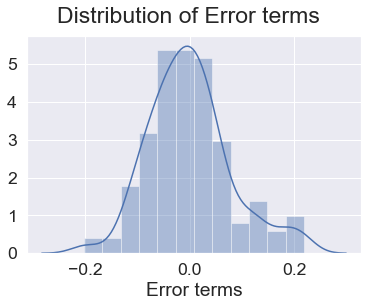

In [131]:
#Plot histogram of error terms (difference between predicted and actual train values)

fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle("Distribution of Error terms")
plt.xlabel("Error terms")

> **Observation:** Error terms are normally distributed with a mean of zero, so we can use this model to do predictions

<a id='4.1'></a>
## Predicting and Model Evaluation

Let's predict the car prices in the test data set using linear regression model numer 12

<a id='5.1'></a>
## Prepare Test Data

In [132]:
#Rescale test data
data_test[vars_to_scale] = scaler.transform(data_test[vars_to_scale])

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [133]:
#Verify outcome of scaling
data_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_make_audi,car_make_bmw,car_make_buick,car_make_chevrolet,car_make_dodge,car_make_honda,car_make_isuzu,car_make_jaguar,car_make_mazda,car_make_mercury,car_make_mitsubishi,car_make_nissan,car_make_peugeot,car_make_plymouth,car_make_porsche,car_make_renault,car_make_saab,car_make_subaru,car_make_toyota,car_make_volkswagen,car_make_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.58,0.11,0.18,0.56,0.03,0.44,0.56,0.48,0.56,0.43,0.23,0.27,0.56,0.54,0.21,0.25,0.39,0.33,0.36,0.24,0.03,0.03,0.05,0.00,0.05,0.06,0.02,0.00,0.06,0.02,0.06,0.06,0.05,0.05,0.03,0.00,0.05,0.02,0.19,0.08,0.08,0.08,0.34,0.45,0.10,0.56,0.42,0.00,0.05,0.81,0.05,0.06,0.00,0.26,0.00,0.11,0.02,0.50,0.05,0.02
std,0.27,0.32,0.39,0.50,0.18,0.21,0.19,0.17,0.22,0.18,0.09,0.16,0.23,0.16,0.27,0.16,0.19,0.17,0.18,0.23,0.18,0.18,0.22,0.00,0.22,0.25,0.13,0.00,0.25,0.13,0.25,0.25,0.22,0.22,0.18,0.00,0.22,0.13,0.40,0.27,0.27,0.27,0.48,0.50,0.30,0.50,0.50,0.00,0.22,0.40,0.22,0.25,0.00,0.44,0.00,0.32,0.13,0.50,0.22,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.18,0.14,0.13,0.20,0.07,-0.11,-0.06,0.00,0.02,0.00,0.03,-0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.00,0.00,0.00,0.00,0.31,0.46,0.36,0.38,0.31,0.20,0.18,0.40,0.48,0.09,0.11,0.27,0.17,0.22,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.60,0.00,0.00,1.00,0.00,0.39,0.55,0.44,0.59,0.41,0.20,0.23,0.56,0.59,0.12,0.22,0.35,0.31,0.35,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00
75%,0.80,0.00,0.00,1.00,0.00,0.57,0.72,0.52,0.70,0.56,0.20,0.32,0.75,0.64,0.15,0.30,0.54,0.44,0.46,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.18,1.09,0.98,1.06,0.94,0.60,0.93,0.89,0.86,1.00,0.66,1.00,0.69,0.81,1.11,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [134]:
#Create X,y for test dataset
y_test = data_test.pop('price')
X_test = data_test

In [135]:
y_test.shape
X_test.shape

(62,)

(62, 59)

In [136]:
# Drop variables from X_test which are not in X_train
X_test = X_test[X_train12.columns]

# Add constant variable 
X_test_const = sm.add_constant(X_test)

C:\Users\ksami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<a id='5.1'></a>
## Predict Prices on Test Data

In [137]:
# Making predictions using the model
y_test_pred = model12.predict(X_test_const)

Text(0.5, 0.98, 'y_test vs y_pred')

Text(0.5, 0, 'y_test')

Text(0, 0.5, 'y_pred')

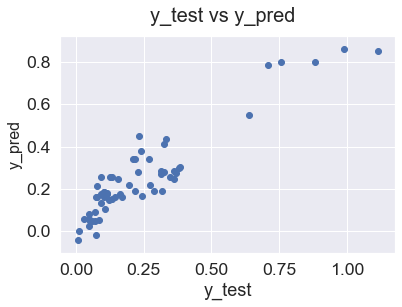

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

<a id='5.2'></a>
## Evaluate Model

Let's first visualize the actual vs predicted car prices in the test data set

In [139]:
y_test.shape

(62,)

Text(0.5, 0.98, 'Actual vs Predicted Test Data')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Car Prices')

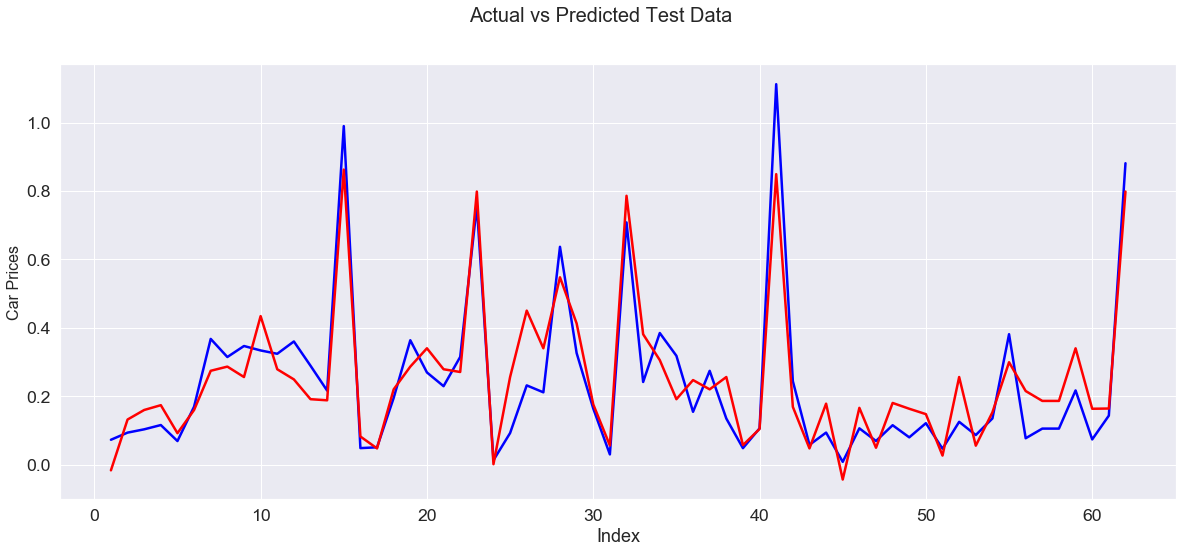

In [140]:
#Let's visualize Actual vs Predicted for Test Data
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted Test Data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Prices', fontsize=16)                               # Y-label

In [141]:
#Let's get the r-square for test data
r2_score(y_test, y_test_pred)

0.8564792061048639

<a id='5.3'></a>
## Analysis Conclusion: 

The model explains 85.6% of variance in car price is explained by the 8 independent variables and their relationship is given as: 

**price = 0.0254 + 0.1228 * enginelocation + 0.8875 enginesize + 0.1286 * peakrpm + 0.2237 * car_make_bmw - 0.0283 * car_make_peugeot + 0.1453 * car_make_porsche + 0.1755 * fuelsystem_idi -0.2887 *citympg**

Peugeot's brand appears to negatively impact its price whereas Porsche and BMW positively impacts its price. 

Overall it's that **engine size**, **mileage** and **brand/make** are the key drivers for car price which Geely Auto must focus on.

This is a pretty good model although it can be improved perhaps by adding derivative features such as ratios based on domain knowledge.


<a id='6'></a>
## References

**Domain Research References**

- Data Dictionary - https://archive.ics.uci.edu/ml/datasets/automobile
- Fuel Injection - https://www.cars.com/articles/what-are-the-different-types-of-fuel-injection-1420690418419/
- Fuel Economy - https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles
- Relationship between compression ratio and fuel economy - https://auto.howstuffworks.com/compression-ratio-fuel-economy.htm
- Engine displacement (size) and relationship with horsepower - https://www.yourmechanic.com/article/what-is-engine-displacement 
- Engine displacement calculator - http://performancetrends.com/Calculators/Engine-Displacement/Engine-Displacement.php
- Aspiration - https://www.autoinfluence.com/quick-look-difference-naturally-aspirated-turbocharged-engines/
- Fuel system - https://www.cars.com/articles/what-are-the-different-types-of-fuel-injection-1420690418419/
